## Homogeneous coordinates
### Exercise 1.1
$$ q_1 = \begin{bmatrix}
1\\
2
\end{bmatrix},
q_2 = \begin{bmatrix}
2\\
1
\end{bmatrix},
q_3 = \begin{bmatrix}
-6\\
-4
\end{bmatrix},
q_4 = \begin{bmatrix}
10\\
6
\end{bmatrix}
$$

### Exercise 1.2
$$
Q_1 = \begin{bmatrix}
1\\
10\\
-3
\end{bmatrix},
Q_2 = \begin{bmatrix}
1\\
-2\\
0.55
\end{bmatrix},
Q_3 = \begin{bmatrix}
0\\
0\\
-0.1
\end{bmatrix},
Q_4 = \begin{bmatrix}
-5\\
1\\
2
\end{bmatrix}
$$

### Exercise 1.3
$$
x + 2y - 3 = 0 ==> l = \begin{bmatrix}
1 \\ 2 \\ -3
\end{bmatrix}
$$


### Exercise 1.4 
$$ l = \begin{bmatrix}
1 & 2 & -3
\end{bmatrix}^T
\\
$$

$$
l^T * p1 = 0; \\ 
l^T * p2 = 0; \\
l^T * p3 = -3; \\ 
l^T * p4 = 0; \\ 
l^T * p5 = 0; \\ 
l^T * p6 = 16;
$$
>so the answer is p1,p2,p4,p5

### Exercise 1.5
$$
l_0 = \begin{bmatrix}
1 \\ 1 \\ -1
\end{bmatrix}, 
l_1 = \begin{bmatrix}
-1 \\ 1 \\ -3
\end{bmatrix}
\\

q_I = l_0 \times l_1 = 
\begin{bmatrix}
(1*-3) - (-1*1) \\ (-1*-1) - (-3*1) \\ (1*1)-(-1*1)
\end{bmatrix} = 
\begin{bmatrix}
-2\\ 4 \\ 2
\end{bmatrix}
$$

### Exercise 1.6
Consider $p = \begin{bmatrix}
x \\ y \\ 1
\end{bmatrix}$, so $Ap = q = \begin{bmatrix}
10x+2 \\ 10y-3 \\ 1
\end{bmatrix} $

>The first row in matrix A scales the x-coordinate of p by a factor of 10. The second row scales the y-coordinate by a factor of 10. The third row does not modify the x and y coordinates, but adds a constant of 2 to the x-coordinate and subtracts 3 from the y-coordinate. The third element of the result, 1, represents the homogeneous coordinate.

### Exercise 1.7

In [1]:
import numpy as np
def distance_line_point(l, p):
    d_num = abs(np.dot(l.T, p))
    d_den = abs(p[2]) * np.sqrt(l[0]**2 + l[1]**2)
    return d_num / d_den

l = np.array([1/np.sqrt(2), 1/np.sqrt(2), -1])
p1 = np.array([0, 0, 1])
p2 = np.array([np.sqrt(2), np.sqrt(2), 1])
p3 = np.array([np.sqrt(2), np.sqrt(2), 4])

print("Distance between line and p1:", distance_line_point(l, p1))
print("Distance between line and p2:", distance_line_point(l, p2))
print("Distance between line and p3:", distance_line_point(l, p3))

Distance between line and p1: 1.0000000000000002
Distance between line and p2: 1.0000000000000002
Distance between line and p3: 0.5000000000000001


### Exercise 1.8

In [2]:
l = np.array([2, 2, -1])
print("Distance between line and p1:", distance_line_point(l, p1))
print("Distance between line and p2:", distance_line_point(l, p2))
print("Distance between line and p3:", distance_line_point(l, p3))

Distance between line and p1: 0.35355339059327373
Distance between line and p2: 1.6464466094067263
Distance between line and p3: 0.14644660940672627


## Programming Exercises
The programming exercises in this course will assume that you are programming in Python and
using OpenCV. It will be possible to follow the course using a different language such as MATLAB,
but you will be more on your own. We suggest that you use a tool where you can interactively run
Python code, such as Jupyter notebook, Spyder or VS code.
### Setting up
First you should do a few introductory exercises that will prepare you for the later exercises in the
course.

### Exercise 1.9
Please install OpenCV 4.4.0 or later in your Python environment. Tip: You can check which version you have installed by running

In [3]:
import cv2
print(cv2.__version__)

4.7.0


### Exercise 1.10
In later weeks you will work on images your capture yourself. To prepare for this

• Capture an image with a camera 

• Transfer it to your computer

• Load it with OpenCV

• Display it with Matplotlib


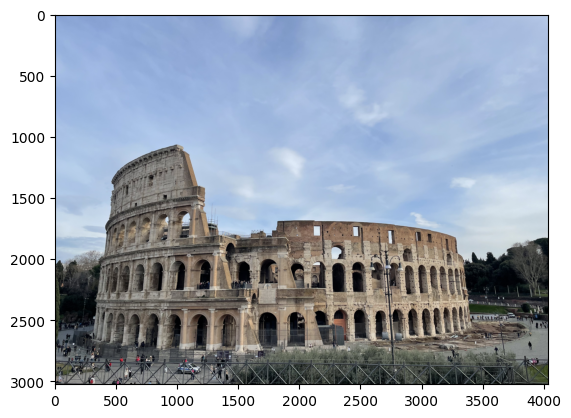

In [4]:
import matplotlib.pyplot as plt
img = cv2.imread('Colosseum.jpg')
img = img[:,:,::-1]
plt.imshow(img)

### Pinhole camera
This time you will get familiar with manipulating points in programs. We will build a couple of
helper functions, which in the end will let you project several 3D points into an image plane.

### Exercise 1.11
Let us define a function box3d, that generates a list of coordinates (a 3 × n array) in a box shaped
like Figure 1. The box is made of points along the 12 edges and in addition, we insert a cross
through the middle. Each line has 16 points between −0.5 and 0.5.
Consider using the following implementation of the function:
```
import itertools as it
def box3d(n=16):
    points = []
    N = tuple(np.linspace(-1, 1, n))
    for i, j in [(-1, -1), (-1, 1), (1, 1), (0, 0)]:
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
    return np.hstack(points)/2
```

### Exercise 1.12
Implement a two helper-functions:

• Pi that converts from homogeneous to inhomogeneous coordinates, and

• PiInv that converts from inhomogeneous to homogeneous coordinates.

The functions should take Numpy arrays with size (dimension of point × number of points) as
their input.

Tip: To add homogeneous coordinate to a matrix you can use np.vstack with np.ones.

Tip: You can divide by and remove the last coordinate by doing p = ph[:-1]/ph[-1]

In [5]:
import numpy as np

def Pi(ph):
    return ph[:-1]/ph[-1]

def PiInv(p):
    return np.vstack((p, np.ones(p.shape[1])))


### Exercise 1.13
Now lets us make our “camera”. Create a function projectpoints, that takes as inputs:

• the camera matrix K

• the pose of the camera (R, t)

• a 3 × n matrix (Q), representing n points in 3D to be projected into the camera.

The function should return the projected 2D points as a 2 × n matrix.
Test your function $Q$ = $box3d$,

$$
K = R =\begin{bmatrix}
1 & 0 & 0\\ 0 & 1 & 0 \\ 0 & 0 & 1
\end{bmatrix}
, t =
\begin{bmatrix}
0 \\ 0 \\ 4
\end{bmatrix}
$$
Tip: You can do matrix multiplication in Numpy using @, for example A@b.

In [ ]:
def projectpoints(K, R, t, Q):
    P = K @ np.vstack((R, t)) @ PiInv(Q)
    return Pi(P)

>The function projectpoints takes four inputs: the camera matrix $K$, the pose of the camera $(R, t)$, and a 3 × n matrix $Q$, representing n points in 3D to be projected into the camera. The function first computes the 3D to 2D projection matrix P using the camera matrix K, the pose $R$ and $t$, and the function PiInv to convert the 3D points in $Q$ to homogeneous coordinates. Finally, the function returns the 2D projected points by dividing each row in the matrix $P$ except the last one by the last row, using the function $Pi$.

### Exercise 1.14
Try instead with 
$
R = \begin{bmatrix}
cos(\theta) & 0 & sin(\theta) \\ 
0 & 1 & 0 \\ 
-sin(\theta) & 0 & cos(\theta)
\end{bmatrix}
$

where $\theta$=30°. What is the effect?

> The effect of using a different rotation matrix R in the function projectpoints would result in a different orientation of the 3D points in the 2D image.
In this case, the rotation matrix R is defined as:
$
R = \begin{bmatrix}
cos(\theta) & 0 & sin(\theta) \\ 
0 & 1 & 0 \\ 
-sin(\theta) & 0 & cos(\theta)
\end{bmatrix}
$
where $θ = 30^{\circ}$. This rotation matrix represents a rotation of 30 degrees around the $z$-axis.
By using this rotation matrix $R$, the function projectpoints will now project the 3D points in the camera coordinate system with a rotation of 30 degrees around the $z$-axis. This would result in a different orientation of the 3D points in the 2D image compared to when using the identity matrix as the rotation matrix.

### Exercise 1.15
> The relationship between the position of the camera and $t$ is that $t$ represents the translation of the camera in the world coordinate system. The translation t defines the position of the origin of the camera coordinate system relative to the world coordinate system.\
\
If t is set to a value such as t = [0, 0, 4], then the origin of the camera coordinate system is located 4 units along the positive $z$-axis relative to the world coordinate system. On the other hand, if $t$ is set to a value such as $t$ = [0, 0, -4], then the origin of the camera coordinate system is located 4 units along the negative $z$-axis relative to the world coordinate system.\
\
By changing the value of $t$, you can effectively change the position of the camera in the world coordinate system, and thus, the location from which the 3D points are being projected into the camera.